In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [38]:

# Wavefront propagation
def find_value_map(value_map, directions, rows, cols):
    changed = True
    current_value = 2
    
    while changed:
        changed = False
        current_value += 1
        
        # Find all cells with previous value
        cells = np.where(value_map == current_value - 1)
        
        for cell_idx in range(len(cells[0])):
            curr_row, curr_col = cells[0][cell_idx], cells[1][cell_idx]
            
            # Check all neighboring cells
            for dr, dc in directions:
                new_row, new_col = curr_row + dr, curr_col + dc
                
                # Check if within bounds and not obstacle
                if (0 <= new_row < rows and 0 <= new_col < cols and 
                    value_map[new_row, new_col] == float('inf')):
                    value_map[new_row, new_col] = current_value
                    changed = True


In [39]:
# wavefront back-tracking
def find_trajectory(value_map, directions, rows, cols, start_row, start_column, goal_row, goal_col):
    # Generate trajectory from start to goal
    trajectory = []
    curr_pos = (start_row, start_column)
    trajectory.append(curr_pos)
    
    while curr_pos != (goal_row, goal_col):
        curr_row, curr_col = curr_pos
        min_value = float('inf')
        next_pos = None
        
        # Check all neighbors for minimum value
        for dr, dc in directions:
            new_row, new_col = curr_row + dr, curr_col + dc
            
            if (0 <= new_row < rows and 0 <= new_col < cols and 
                value_map[new_row, new_col] < min_value and 
                value_map[new_row, new_col] > 1):
                min_value = value_map[new_row, new_col]
                next_pos = (new_row, new_col)
        
        if next_pos is None:
            raise ValueError("No valid path found to goal")
            
        curr_pos = next_pos
        trajectory.append(curr_pos)
    
    return trajectory

In [40]:
def planner(map_data, start_row, start_column):
    """
    Implements the wavefront planner algorithm to find optimal path to goal
    
    Args:
        map_data (list): 2D list representing the environment
        start_row (int): Starting position row
        start_column (int): Starting position column
    
    Returns:
        tuple: (value_map, trajectory)
            - value_map: 2D array with wavefront values
            - trajectory: List of coordinates representing the optimal path
    """
    # Convert input map to numpy array for easier manipulation
    map_array = np.array(map_data)
    rows, cols = map_array.shape
    
    # Create value map initialized with high values
    value_map = np.full_like(map_array, fill_value=float('inf'), dtype=float)
    
    # Set obstacles to 1
    value_map[map_array == 1] = 1 # o(raws*columns)
    
    # Find goal position (marked as 2 in original map)
    goal_pos = np.where(map_array == 2)
    goal_row, goal_col = goal_pos[0][0], goal_pos[1][0]
    
    # Initialize goal with value 2
    value_map[goal_row, goal_col] = 2
    
    # Define 8-point connectivity movements (prioritized order)
    # [up, right, down, left, up-right, down-right, down-left, up-left]
    directions = [
        (-1, 0), (0, 1), (1, 0), (0, -1),
        (-1, 1), (1, 1), (1, -1), (-1, -1)
    ]
    
    find_value_map(value_map, directions, rows, cols)
    
    trajectory = find_trajectory(value_map, directions, rows, cols, start_row, start_column, goal_row, goal_col)
        
    return value_map.tolist(), trajectory

In [41]:
def visualize_path(map_data, trajectory):
    """
    Visualizes the environment and the planned trajectory
    
    Args:
        map_data (list): 2D list representing the environment
        trajectory (list): List of coordinates representing the path
    """
    # plt.figure(figsize=(6, 4))
    plt.imshow(map_data, cmap='binary')
    
    # Plot trajectory
    traj_y, traj_x = zip(*trajectory)
    plt.plot(traj_x, traj_y, 'r-', linewidth=2, label='Trajectory')
    
    # plt.grid(True)
    plt.axis('off')
    plt.legend()
    plt.title('Wavefront Planner Path')
    plt.show()

In [44]:
def plot_map(matrix, trajectory):
    """
    Plots the grid map with a given trajectory path highlighted in red.

    Args:
        matrix (numpy.ndarray): The grid matrix to be plotted.
        trajectory (list of tuple): The trajectory path as a list of (row, col) coordinates.
    """
    # Create a copy of the matrix to modify for plotting
    plot_matrix = np.zeros_like(matrix, dtype=int)

    # Mark cells with value 1 as grey (1 in plot_matrix)
    plot_matrix[matrix == 1] = 1

    # Mark trajectory cells as red (2 in plot_matrix)
    for row, col in trajectory:
        plot_matrix[row, col] = 2

    # Define the colormap: 0 -> white, 1 -> grey, 2 -> red
    cmap = mcolors.ListedColormap(['white', 'grey', 'red'])

    # Plot the matrix
    fig, ax = plt.subplots()
    cax = ax.imshow(plot_matrix, cmap=cmap, interpolation='nearest')

    # Annotate each cell with its value from the original matrix
    rows, cols = matrix.shape
    for i in range(rows):
        for j in range(cols):
            ax.text(j, i, str(int(matrix[i, j])), ha='center', va='center', color='black', fontsize=8)

    ax.axis('off')
    plt.show()


[(13, 2), (12, 3), (12, 4), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (11, 11), (10, 12), (9, 13), (8, 14), (7, 15), (6, 16), (5, 16), (4, 16), (3, 16), (2, 17)]


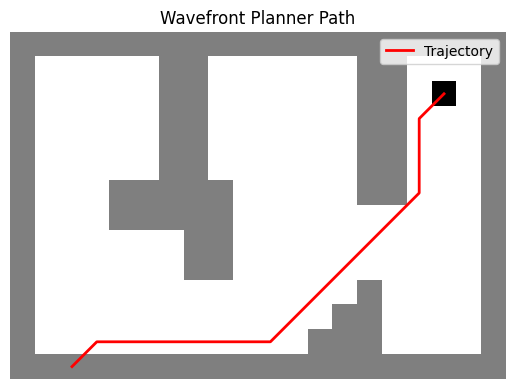

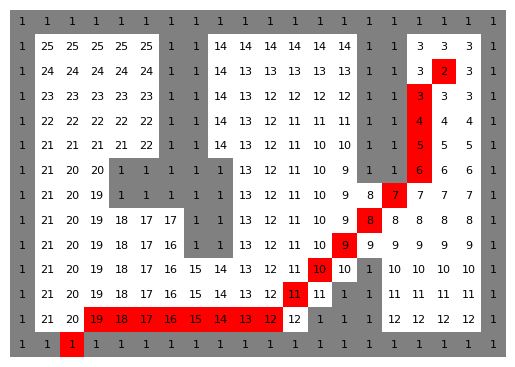

In [46]:
# Test map from the assignment
test_map = [
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1],
    [1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,2,0,1],
    [1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1],
    [1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1],
    [1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1],
    [1,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,1],
    [1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
]

# Run planner
value_map, trajectory = planner(test_map, 13, 2)
print(trajectory)
# Visualize results
visualize_path(test_map, trajectory)
plot_map(np.array(value_map), trajectory)